In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_path, start, end):
    df = pd.read_csv(file_path, skiprows=range(1, start), nrows=end-start+1)
    # print(df)
    return df[["id", "Time"]]
    
def draw_all(hard_scan, chunk_size_50, chunk_size_200, chunk_size_1000, chunk_size_500000):
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.plot(hard_scan["id"], hard_scan["Time"], label="Hard_Scan")
    plt.plot(chunk_size_50["id"], chunk_size_50["Time"], label="Chunk_Size_50")
    plt.plot(chunk_size_200["id"], chunk_size_200["Time"], label="Chunk_Size_200")
    plt.plot(chunk_size_1000["id"], chunk_size_1000["Time"], label="Chunk_Size_1000")
    plt.plot(chunk_size_500000["id"], chunk_size_500000["Time"], label="Chunk_Size_500000")
    
    plt.xlabel("负载id")
    plt.ylabel("查询时间Time(s)")
    plt.title("不同chunk_size在负载集合上的表现")
    
    plt.grid(True)
    plt.xticks(hard_scan["id"])

    # plt.legend()
    plt.legend().get_frame().set_alpha(0.5)
    
    folder_path = f"./query_1"
    if not os.path.exists(folder_path):
            os.makedirs(folder_path)
    plt.savefig(f"./query_1/total.png")
    
    plt.show()
    
def draw_each_pair(hard_scan, segment_tree, chunk_size):
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.plot(hard_scan["id"], hard_scan["Time"], label="Hard_Scan")
    plt.plot(segment_tree["id"], segment_tree["Time"], label="Chunk_Size_" + str(chunk_size))
    
    plt.xlabel("负载id")
    plt.ylabel("查询时间Time(s)")
    plt.title("chunk_size为" + str(chunk_size) + "时与硬扫描在负载集合上的表现")
    
    plt.grid(True)
    plt.xticks(hard_scan["id"])
    
    plt.legend()
    plt.savefig(f"./query_1/chunk_size_" + str(chunk_size) + ".png")
    plt.show()
    



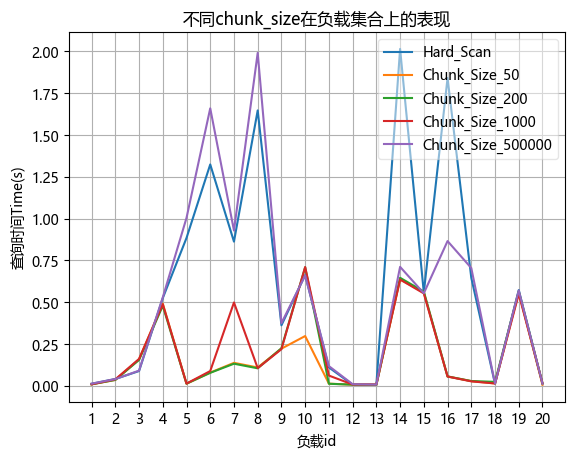

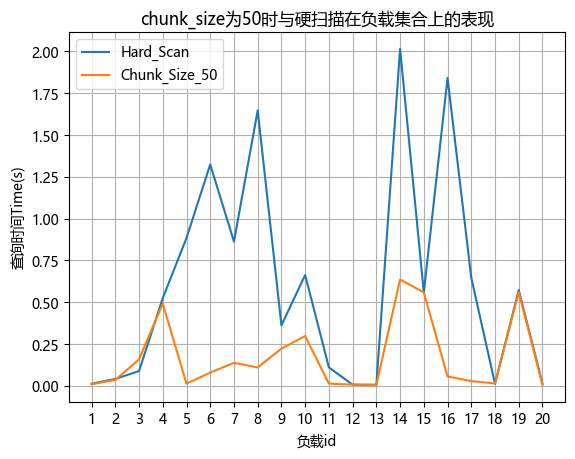

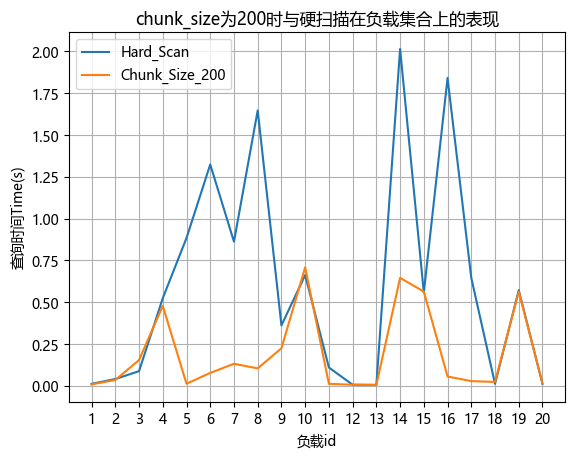

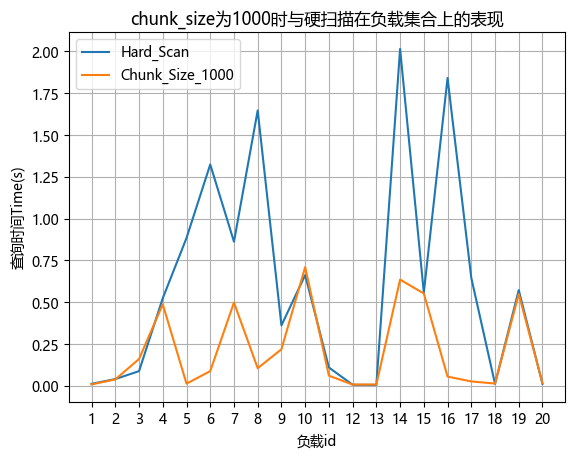

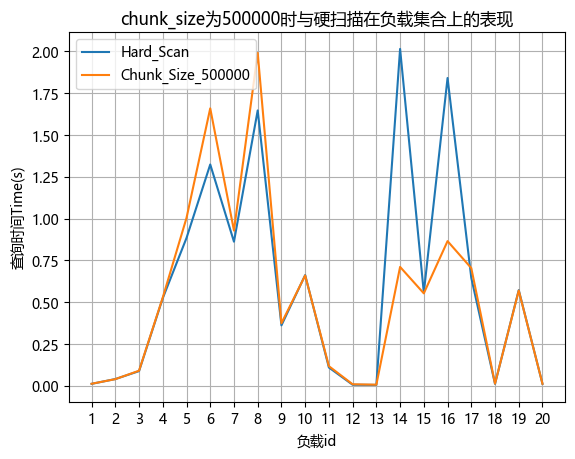

In [9]:

file_path_50 = r"result_segment_tree50.csv"
file_path_200 = r"result_segment_tree200.csv"
file_path_1000 = r"result_segment_tree1000.csv"
file_path_500000 = r"result_segment_tree500000.csv"

hard_scan = []
chunk_size_50 = []
chunk_size_200 = []
chunk_size_1000 = []
chunk_size_500000 = []

hard_scan = read_csv(file_path_500000, 21, 40)
# print(hard_scan)
chunck_size_50 = read_csv(file_path_50, 1, 20)
chunk_size_200 = read_csv(file_path_200, 1, 20)
chunk_size_1000 = read_csv(file_path_1000, 1, 20)
chunk_size_500000 = read_csv(file_path_500000, 1, 20)

draw_all(hard_scan, chunck_size_50, chunk_size_200, chunk_size_1000, chunk_size_500000)

draw_each_pair(hard_scan, chunck_size_50, 50)
draw_each_pair(hard_scan, chunk_size_200, 200)
draw_each_pair(hard_scan, chunk_size_1000, 1000)
draw_each_pair(hard_scan, chunk_size_500000, 500000)